<a href="https://colab.research.google.com/github/SergioAmado1408/taller-3/blob/main/Tallerr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 3

Ana Garzon

Sergio Amado

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
import cvxpy as cp
from scipy.optimize import minimize
from scipy.stats import norm
!pip install --quiet pyDOE
from pyDOE import lhs
!pip install --quiet pyfinance==0.2.0
import pyfinance as pf

In [79]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Punto 1

In [95]:
Acciones = 'PFE', 'KO', 'GS', 'JNJ', 'CVX'
Fi = '2017-12-01'
Ff= '2022-12-31'
Periodo = '1mo'

# Precios de cierre de los activos
Precios = yf.download(Acciones, Fi, Ff, interval=Periodo)['Adj Close']

# Retornos de los activos
Retornos = np.log(Precios/Precios.shift()).dropna()

# Indice Dow Jones
P_indice = yf.download('^DJI', Fi, Ff, interval=Periodo)['Adj Close']
R_indice = np.log(P_indice/P_indice.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [113]:
Activo1 = 'PFE'
P1 = yf.download(Activo1, Fi, Ff, interval=Periodo)['Adj Close']
R1 = np.log(P1/P1.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [114]:
Activo2 = 'KO'
P2 = yf.download(Activo2, Fi, Ff, interval=Periodo)['Adj Close']
R2 = np.log(P2/P2.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [115]:
Activo3 = 'GS'
P3 = yf.download(Activo3, Fi, Ff, interval=Periodo)['Adj Close']
R3 = np.log(P3/P3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [116]:
Activo4 = 'JNJ'
P4 = yf.download(Activo4, Fi, Ff, interval=Periodo)['Adj Close']
R4 = np.log(P4/P4.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [117]:
Activo5 = 'CVX'
P5 = yf.download(Activo5, Fi, Ff, interval=Periodo)['Adj Close']
R5 = np.log(P5/P5.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [118]:
P_indice = yf.download('^DJI', Fi, Ff, interval=Periodo)['Adj Close']
R_indice = np.log(P_indice/P_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [119]:
X = pd.concat([R1], axis = 1)
Y = R_indice
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     13.58
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000504
Time:                        03:25:55   Log-Likelihood:                 97.242
No. Observations:                  60   AIC:                            -190.5
Df Residuals:                      58   BIC:                            -186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.006      0.281      0.7

In [136]:
X = pd.concat([R2], axis = 1)
Y = R_indice
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.44e-08
Time:                        03:36:42   Log-Likelihood:                 107.69
No. Observations:                  60   AIC:                            -211.4
Df Residuals:                      58   BIC:                            -207.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.834e-05      0.005     -0.017      0.9

In [137]:
X = pd.concat([R3], axis = 1)
Y = R_indice
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        03:36:51   Log-Likelihood:                 125.77
No. Observations:                  60   AIC:                            -247.5
Df Residuals:                      58   BIC:                            -243.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.004      0.432      0.6

In [138]:
X = pd.concat([R4], axis = 1)
Y = R_indice
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           9.89e-08
Time:                        03:36:58   Log-Likelihood:                 105.74
No. Observations:                  60   AIC:                            -207.5
Df Residuals:                      58   BIC:                            -203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.163      0.8

In [139]:
X = pd.concat([R5], axis = 1)
Y = R_indice
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     60.08
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.60e-10
Time:                        03:37:05   Log-Likelihood:                 112.26
No. Observations:                  60   AIC:                            -220.5
Df Residuals:                      58   BIC:                            -216.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.183      0.8

In [126]:
x = R_indice
y = R1
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol1= np.linalg.solve(X,Xy)

In [127]:
x = R_indice
y = R2
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol2= np.linalg.solve(X,Xy)

In [128]:
x = R_indice
y = R3
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol3= np.linalg.solve(X,Xy)

In [129]:
x = R_indice
y = R4
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol4= np.linalg.solve(X,Xy)

In [130]:
x = R_indice
y = R5
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol5= np.linalg.solve(X,Xy)

In [131]:
#lineas
B1 = Sol1.T
B2 = Sol2.T
B3 = Sol3.T
B4 = Sol4.T
B5 = Sol5.T

In [132]:
Beta1 = B1[:,0].tolist()
Sigma1 = np.sqrt(R1.var())

Beta2 = B2[:,0].tolist()
Sigma2 = np.sqrt(R2.var())

Beta3 = B3[:,0].tolist()
Sigma3 = np.sqrt(R3.var())

Beta4 = B4[:,0].tolist()
Sigma4 = np.sqrt(R4.var())

Beta5 = B5[:,0].tolist()
Sigma5 = np.sqrt(R5.var())

In [133]:
Beta = pd.DataFrame([Beta1, Beta2, Beta3, Beta4, Beta5], index = Acciones, columns = ['Beta'])
Sigma = pd.DataFrame([Sigma1, Sigma2, Sigma3, Sigma4, Sigma5], index = Acciones, columns = ['sigma'])

In [134]:
MI_1 = R_indice.mean()
MI_1

0.004889644163221778

In [140]:
CD1 = model1.rsquared
CD2 = model2.rsquared
CD3 = model3.rsquared
CD4 = model4.rsquared
CD5 = model5.rsquared

In [142]:
Resperados = pd.DataFrame([R1.mean(),R2.mean(),R3.mean(),R4.mean(),R5.mean()], index = Acciones, columns=['Retornos Esperados'])
Restimados = pd.DataFrame([Beta1[0]*R_indice.mean(), Beta2[0]*R_indice.mean(), Beta3[0]*R_indice.mean(), Beta4[0]*R_indice.mean(), Beta5[0]*R_indice.mean()], index = Acciones, columns = ['Retornos Estimados'])
CD = pd.DataFrame([CD1, CD2, CD3, CD4, CD5], index = Acciones, columns = ['Coeficientes de determinación']) 

In [143]:
tabla = pd.concat([Resperados, Sigma, Beta, Restimados, CD], axis = 1)
tabla

,Retornos Esperados,sigma,Beta,Retornos Estimados,Coeficientes de determinación
PFE,0.009691,0.072844,0.006796,0.000033,0.508802
KO,0.008096,0.057042,0.004693,0.000023,0.427994
GS,0.006664,0.092545,-0.000332,-0.000002,0.686942
JNJ,0.006112,0.051181,0.003199,0.000016,0.389592
CVX,0.009659,0.092632,0.003633,0.000018,0.508802


Punto 1-b

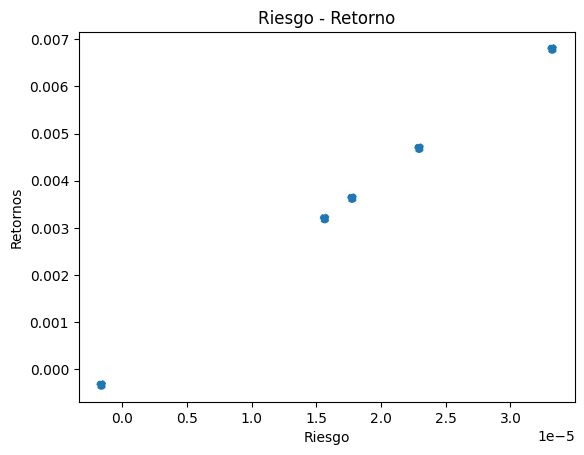

In [146]:
fi,ax=plt.subplots();
ax.scatter(Restimados, Beta, ls='--',marker='o')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retornos')
ax.set_title('Riesgo - Retorno')
plt.show()

Punto 2

In [21]:
Acciones = ['V','MSFT', 'JNJ', 'KO', "JPM"]
Fi = '2017-12-1'
Ff = '2022-12-31'
Periodicidad = '1mo'

In [22]:
Precios = yf.download(Acciones, Fi, Ff, interval = Periodicidad)['Adj Close']
Retornos = np.log(Precios/Precios.shift()).dropna()
P_indice = yf.download('^DJI', Fi, Ff, interval = Periodicidad)['Adj Close']
R_indice = np.log(P_indice/P_indice.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


punto 2-A

In [23]:
#sharpe

cov = Retornos.cov()
cov = np.array(cov)
vretornos = np.array(Retornos.mean())
ones = np.ones(5)
cov_inv = np.linalg.inv(cov)
Vpesos = cov_inv*ones


In [24]:
n = len(vretornos)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ vretornos == 1, x @ vretornos >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
Sharpe = x.value/sum(x.value)
pesos = round(pd.DataFrame(Sharpe).T,4)

Text(0.5, 1.0, 'Plano riesgo retorno ')

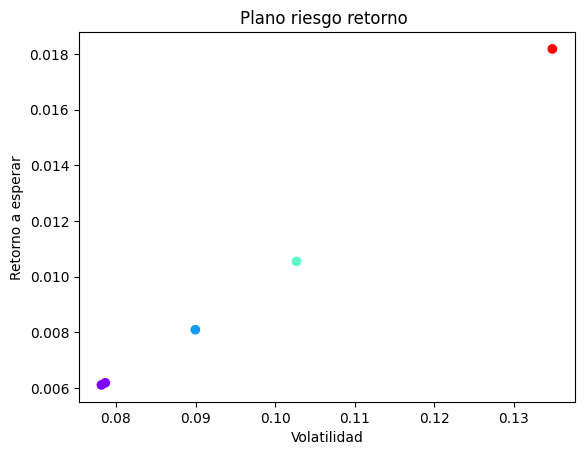

In [27]:
plt.scatter(np.sqrt(vretornos), vretornos, c=vretornos / np.sqrt(vretornos), marker='o', cmap='rainbow');
plt.xlabel('Volatilidad')
plt.ylabel('Retorno a esperar')
plt.title('Plano riesgo retorno ')
     

punto 2-b

In [28]:
#alpha 5%
rp = (Retornos @ Sharpe).mean()
sigmap = (Retornos @ Sharpe).std()
alpha = 0.05
VaR1 = rp - norm.ppf(1-alpha)*sigmap 
VaR1

-0.08159859532634209

In [29]:
#alpha 1%
alpha2 = 0.01
VaR2 = rp - norm.ppf(1-alpha2)*sigmap 
VaR2

-0.12346514281955379

punto 2-c

In [30]:
alpha = 0.05 
eh = Retornos[-5:] 
Vareh = -np.percentile(eh, 5)
Vareh
     

0.10755675824732232

In [31]:
alpha2 = 0.01 
eh2 = Retornos[-5:] 
Vareh2 = -np.percentile(eh2, 1)
Vareh2

0.11279125723092473

Punto 2-D

In [ ]:
#portafolio aleatorio

In [32]:
NS = 10000
pesos_s = np.random.dirichlet(np.ones(len(Retornos.columns)), NS)
retornos_s = np.dot(Retornos, pesos_s.T)
volatilidades_s = np.sqrt(np.diag(np.dot(np.dot(pesos_s, cov), pesos_s.T)))
alpha3 = 0.95
VaR_M = np.percentile(-retornos_s, alpha3*100)
VaR_M

0.08476372746910876

Punto 2-E

La principal diferencia que se puede observar es la del Cvar, ya que en el portafolio tangente de sharpe, este tiene un valor de 0.11279125. Mientras que el valor del portafolio aleatorio es de 0.084763.

Punto 3

Punto 3-A

In [33]:
Activo = 'NVDA'
Fi = '2017-12-01'
Ff = '2022-12-31'
Periodicidad = '1mo'
Precio = yf.download(Activo, Fi, Ff, Periodicidad)['Adj Close']
Retornos = np.log(Precio/Precio.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [34]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0, 0.5, 'Price')

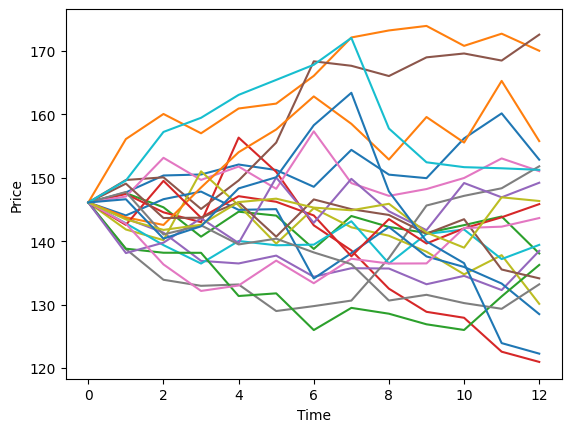

In [35]:
mu = Retornos.mean()*12
sigma = Retornos.std()*np.sqrt(12)
T = 1
S0 = Precio[-1]
NS = 10000
M = 12
St3 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St3[0:21, :])) 
plt.xlabel("Time");
plt.ylabel('Price')

Punto 3-B

In [39]:
S0

146.1151885986328

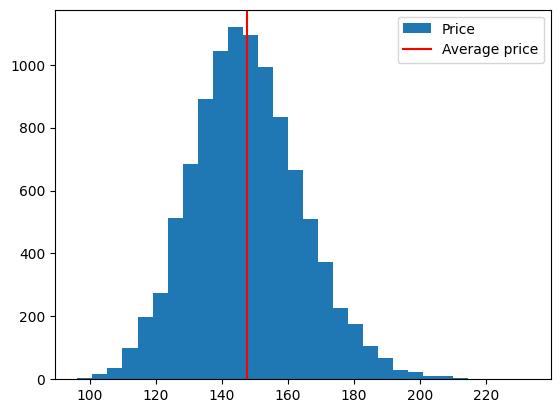

In [36]:
plt.hist(St3[:,-1], bins=30, label='Price')
plt.axvline(St3[:,-1].mean(), color='r', label='Average price')
plt.legend();
     

Se puede observar que existe un sesgamiento hacia el lado izquierdo, lo que indica que el precio promedio puede ser engañoso

Punto 3-c

In [41]:
S0 * np.exp(mu * T) 

147.62434913170935

In [44]:
St3[:,-1].mean()  

147.63295928236744

Punto 3-d

In [52]:
prob = len(St3[St3[:,-1] < S0]) / len(St3)
prob


0.4841

Punto 4

In [53]:
X0 = 1
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X0 = X[:,0]
    dt = T / M
    k=1
    std_dt = np.sqrt(sigma*2 / (2*k) * (1-np.exp(-2*k*dt)))
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)*(X[:,t]-mu) + std_dt * Z[:,t]
    return X

Text(0, 0.5, 'Price')

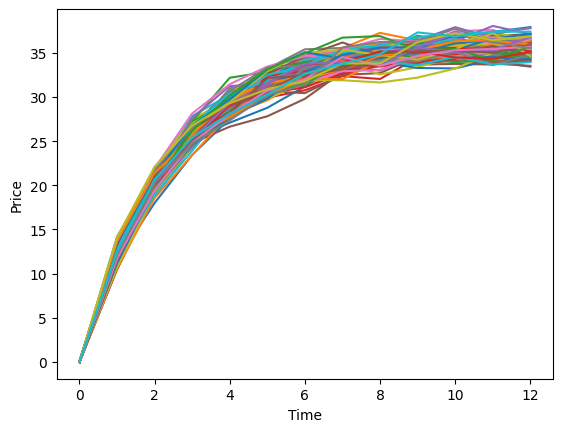

In [55]:
T = 5 
M = 12
mu = 3*12
NS = 100
sigma = 0.3*np.sqrt(12)
X0 = 1
Xt = PathsOU(X0,mu,sigma,T,NS,M)
plt.plot(np.transpose(Xt)) 
plt.xlabel('Time')
plt.ylabel('Price')

Punto 4-b

Se puede observar que lo que tienen todas las trayectorias en comun es que presentan una tendencia positiva

Punto 4-c

Text(0.5, 0, 'Time')

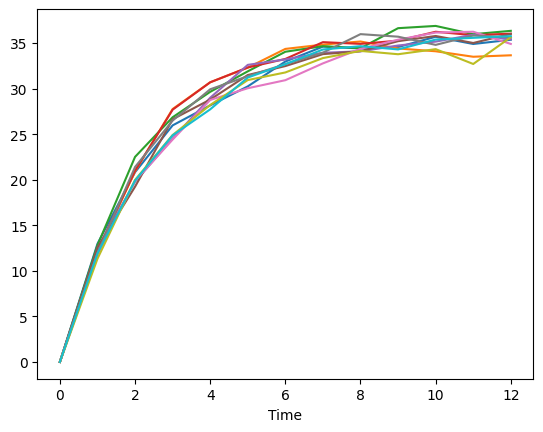

In [57]:
T1 = 5 
mu1 = 3*12
sigma1 = 0.3*np.sqrt(12)
X01 = 1
NS1 = 10
M1 = 12
Xt1 = PathsOU(X01,mu1,sigma1,T1,NS1,M1)
Xt1
plt.plot(np.transpose(Xt1)) 
plt.xlabel("Time")

Punto 4-D

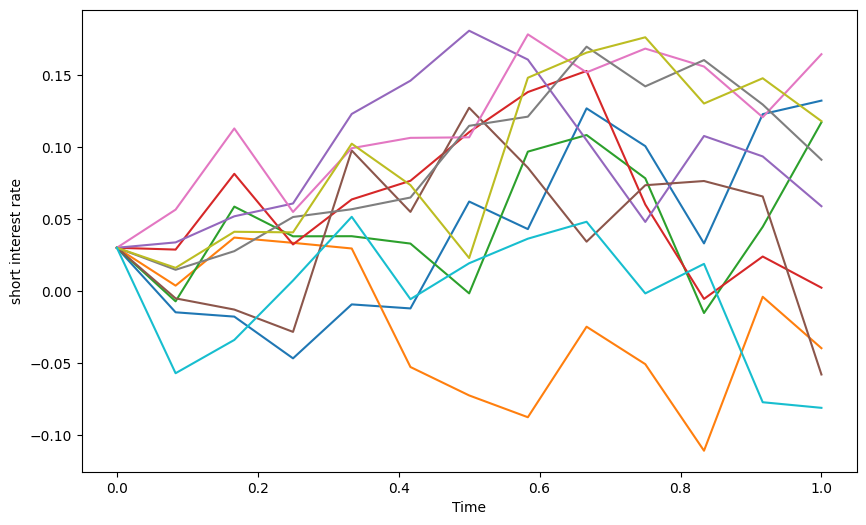

In [59]:
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 12
dt = T/m
r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range(NS):
    for j in range(m):
        r[i,j+1] = r[i,j] + (mu - r[i,j])*dt + sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
      plt.plot(np.linspace(0,T,m+1), r[i,:], label=f"Trayectory {i+1}")
plt.xlabel("Time")
plt.ylabel("short interest rate")
plt.show()

In [69]:
Precio = np.exp(-r[:, -1]*T)*100
print(f"El precio  es: {np.mean(Precio):.4f}")

El precio  es: 96.2940


Punto 5

In [70]:
activos = ('GC=F', 'NG=F', 'KC=F')
fi = '2004-12-01'
ff = '2022-12-31'
precio = yf.download(activos, fi, ff, interval="1Mo")["Adj Close"]
Retornos = np.log(precio/precio.shift()).dropna()

[*********************100%***********************]  3 of 3 completed


Punto 5-A

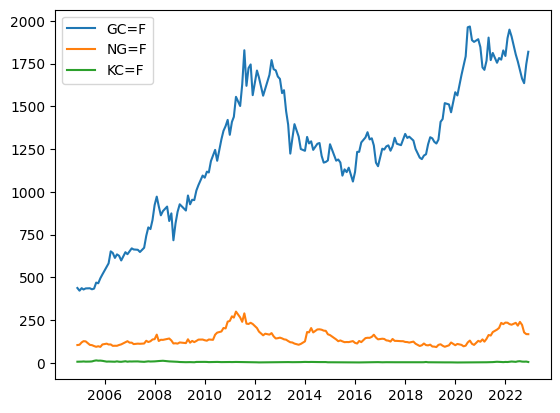

In [71]:
plt.plot(precio)
plt.legend(activos)

Text(0, 0.5, 'Price')

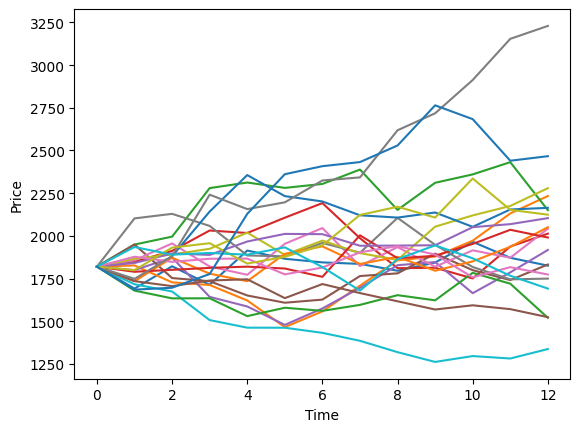

In [87]:
# GOLD FUTURES
mu = Retornos['GC=F'].mean()*12
sigma = Retornos['GC=F'].std()*np.sqrt(12)
T = 1
S0 = precio['GC=F'][-1]
NS = 100
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St[0:21, :])) 
plt.xlabel("Time");
plt.ylabel('Price')
     

Text(0, 0.5, 'Price')

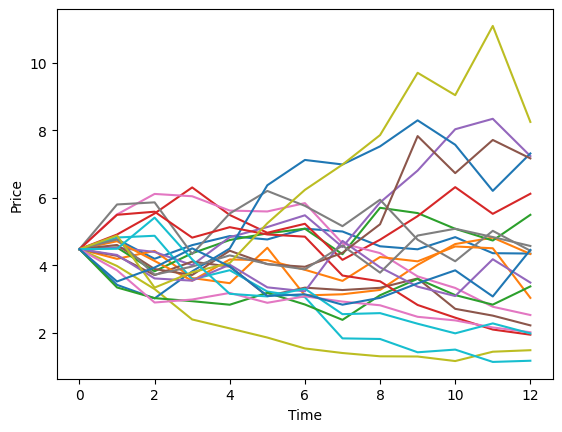

In [94]:
# NATURAL GAS
mu = Retornos['NG=F'].mean()*12
sigma = Retornos['NG=F'].std()*np.sqrt(12)
T = 1
S0 = precio['NG=F'][-1]
NS = 100
M = 12
St1 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St1[0:21, :])) 
plt.xlabel("Time");
plt.ylabel('Price')

Text(0, 0.5, 'Price')

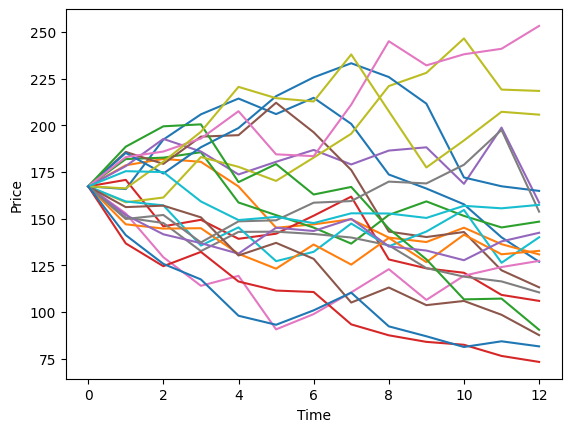

In [88]:
# COFEE FUTURES
mu = Retornos['KC=F'].mean()*12
sigma = Retornos['KC=F'].std()*np.sqrt(12)
T = 1
S0 = precio['KC=F'][-1]
NS = 100
M = 12
St2 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St2[0:21, :])) 
plt.xlabel("Time");
plt.ylabel('Price')

Punto 5-B

In [81]:
prueba = adfuller(precio['GC=F'])  
print("ADF test: %f" % prueba[0])
print("P-value: %f" % prueba[1])
print("Citical values:")
for key, value in prueba[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.539200
P-value: 0.514039
Citical values:
	1%: -3.466201
	5%: -2.877293
	10%: -2.575168


No es estacionaria con un nivel de significancia del 1%, debido a que el valor p es de 0,51, es mayor al 1%

In [82]:
prueba = adfuller(precio['NG=F'])  
print("ADF test: %f" % prueba[0])
print("P-value: %f" % prueba[1])
print("Citical values:")
for key, value in prueba[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.038449
P-value: 0.031456
Citical values:
	1%: -3.468062
	5%: -2.878106
	10%: -2.575602


No es estacionaria con un nivel de significancia del 1%, debido a que el valor p es de 0,031, es mayor al 1%

In [83]:
prueba = adfuller(precio['KC=F'])  
print("ADF test: %f" % prueba[0])
print("P-value: %f" % prueba[1])
print("Citical values:")
for key, value in prueba[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.276489
P-value: 0.015963
Citical values:
	1%: -3.467211
	5%: -2.877735
	10%: -2.575403


No es estacionaria con un nivel de significancia del 1%, debido a que el valor p es de 0,0159, es mayor al 1%

Punto 5-3

In [89]:
St[:,-1].mean()

1974.8079457919252

In [90]:
St1[:,-1].mean()

4.582392640377496

In [91]:
St2[:,-1].mean()

171.83305005465886